# THE SPARK FOUNDATION

## DATA SCIENCE & BUSINESS ANALYST INTERN

### NAME: VIVEK PANDEY

TASK:We will predict the percentage of marks that a student is expected to score based upon the number of hours they studied using Supervised Learning

### Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Importing The Dataset

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


<h3>Exploratory Data Analysis</h3>

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
pair_duplicates = data[['Hours','Scores']].groupby(['Hours','Scores']).count().reset_index()
print ("Number of duplicate Pairs:",(pair_duplicates).shape[0] - data.shape[0])

Number of duplicate Pairs: 0


### DATA VISUALISATION

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script

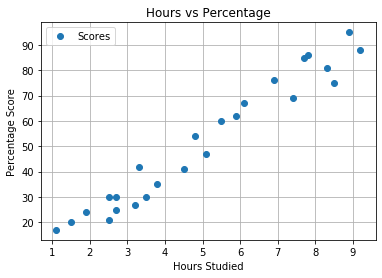

In [6]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

<h3> Preparing The Data</h3>
<p>The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)</p>

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

<h3>Splitting The Dataset in Training And Test Dataset</h3>

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=2) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [10]:
line = regressor.coef_*X+regressor.intercept_


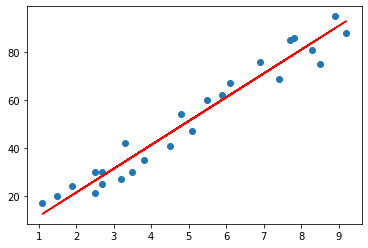

In [11]:
plt.scatter(X, y)
plt.plot(X, line,'r');
plt.show()

### **Making Predictions**


In [12]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


### Comparing Actual result to the Predicted Model result

In [13]:
Compare_data= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
Compare_data

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


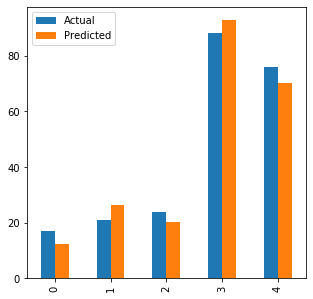

In [14]:
Compare_data.plot(kind='bar',figsize=(5,5))
plt.show()


### Testing the model with our own data

In [15]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.45860055685799


### **Evaluating the model**

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.877039354964484
Mean Squared Error: 24.38762033985666
Root Mean Squared Error: 4.938382360637607
R-2: 0.9735538080811826
